# Conhecendo LinearSVC (Linear Support Vector Classification)

Um classificador é uma função que decide sobre qual classe um objeto pertence. Por exemplo, podemos decidir se um indivíduo é maior de idade ou menor de idade utilizando a função:

In [2]:
def maior_ou_menor(idade):
  if idade >= 18:
    return "maior"
  else:
    return "menor"

print(maior_ou_menor(15))
print(maior_ou_menor(17))
print(maior_ou_menor(22))

menor
menor
maior


O problema é quando a regra não é tão clara. Vejamos outro exemplo:

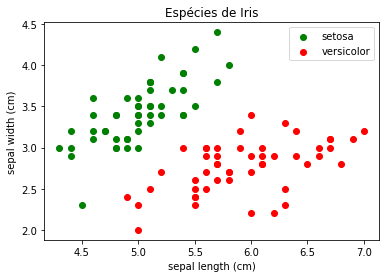

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
data = iris.data[:100,:2]
plt.scatter(data[:50,0], data[:50,1], color='g', label='setosa')
plt.scatter(data[50:,0], data[50:,1], color='r', label='versicolor')
plt.title("Espécies de Iris")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

Nesse exemplo, temos que classificar cada planta em setosa ou versicolor sabendo o comprimento e a largura de suas pétalas. A ideia é encontrar a equação de uma reta que separa as duas classes. Para isso utilizaremos um algoritmo chamado LinearSVC!

# Passo 1: Carregar os dados

In [16]:
import pandas as pd

# escolhi os dados das flores da espécie iris
dados = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data', header=None)
dados.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# veja as 3 primeiras linhas
dados.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Passo 2: Escolha duas colunas numéricas e uma categórica 

In [54]:
# sepal_length e sepal_width são numéricas, class é categórica
dados = dados[['sepal_length', 'sepal_width', 'class']]

## Passo 3: Filtre os dados para ficar com apenas duas categorias

In [56]:
# ficaremos apenas com iris-setosa e iris-versicolor
dados = dados[dados['class'] != 'Iris-virginica']

## Passo 4: Ilustre sua escolha com um gráfico

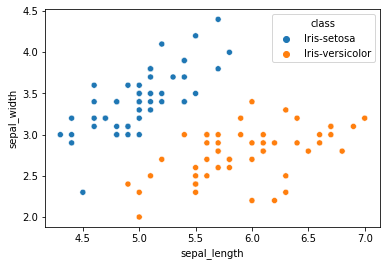

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dados, 
    x="sepal_length", 
    y="sepal_width", 
    hue="class")
plt.show()

## Passo 5: Use o LinearSVC para encontrar os coeficientes da reta

In [27]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados.drop('class', axis=1), dados['class'])

a, b = model.coef_[0]
d = model.intercept_[0]

print('a:', a)
print('b:', b)
print('d:', d)

a: 1.4591278785464814
b: -2.190375468208897
d: -1.0898839703920788


## Passo 6: Desenhe a reta

Os coeficientes acima dizem que a reta é do tipo

$$ax + by + d = 0$$

ou

$$ y = -\frac{a}{b} x - \frac{d}{b}$$

In [28]:
def y(x):
  return -a/b * x - d / b

Agora podemos fazer o gráfico da reta:

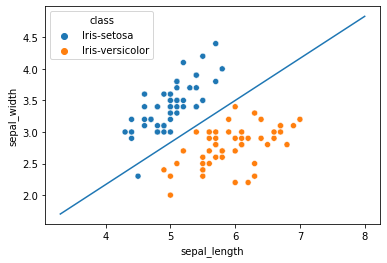

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dados, 
    x="sepal_length", 
    y="sepal_width", 
    hue="class")
x_min = dados['sepal_length'].min() - 1
x_max = dados['sepal_length'].max() + 1
plt.plot([x_min, x_max], [y(x_min), y(x_max)])
plt.show()

Observe que erramos 1!

## Passo 7: Exiba os erros através da matriz de confusão

[[49  1]
 [ 0 50]]


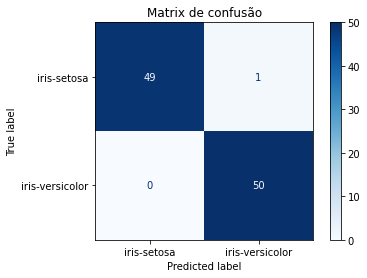

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    dados.drop('class', axis=1),
    dados['class'],
    display_labels=['iris-setosa', 'iris-versicolor'],
    cmap=plt.cm.Blues,
)
disp.ax_.set_title("Matrix de confusão")
print(disp.confusion_matrix)

A matriz acima diz que uma iris setosa foi classificada incorretamente como iris versicolor.

## Passo 8: Escreva explicitamente a função que define o seu classificador

In [46]:
def iris_setosa_ou_versicolor(sepal_length, sepal_width):
  if a * sepal_length + b * sepal_width + d >= 0:
    return 'iris-versicolor'
  else:
    return 'iris-setosa'

print(iris_setosa_ou_versicolor(6,4))
print(iris_setosa_ou_versicolor(7,2))
print(iris_setosa_ou_versicolor(4,3))

iris-setosa
iris-versicolor
iris-setosa


## Passo 9: Faça um gráfico mostrando onde estão os novos pontos classificados

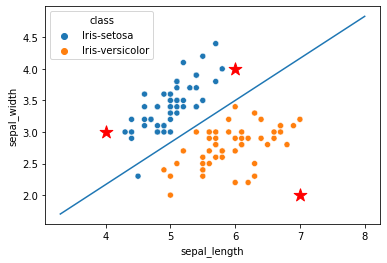

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dados, 
    x="sepal_length", 
    y="sepal_width", 
    hue="class")
x_min = dados['sepal_length'].min() - 1
x_max = dados['sepal_length'].max() + 1
plt.plot([x_min, x_max], [y(x_min), y(x_max)])
plt.scatter([6,7,4],[4,2,3], color='red', s=180, marker='*')
plt.show()